In [8]:
!pip install ultralytics

In [9]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

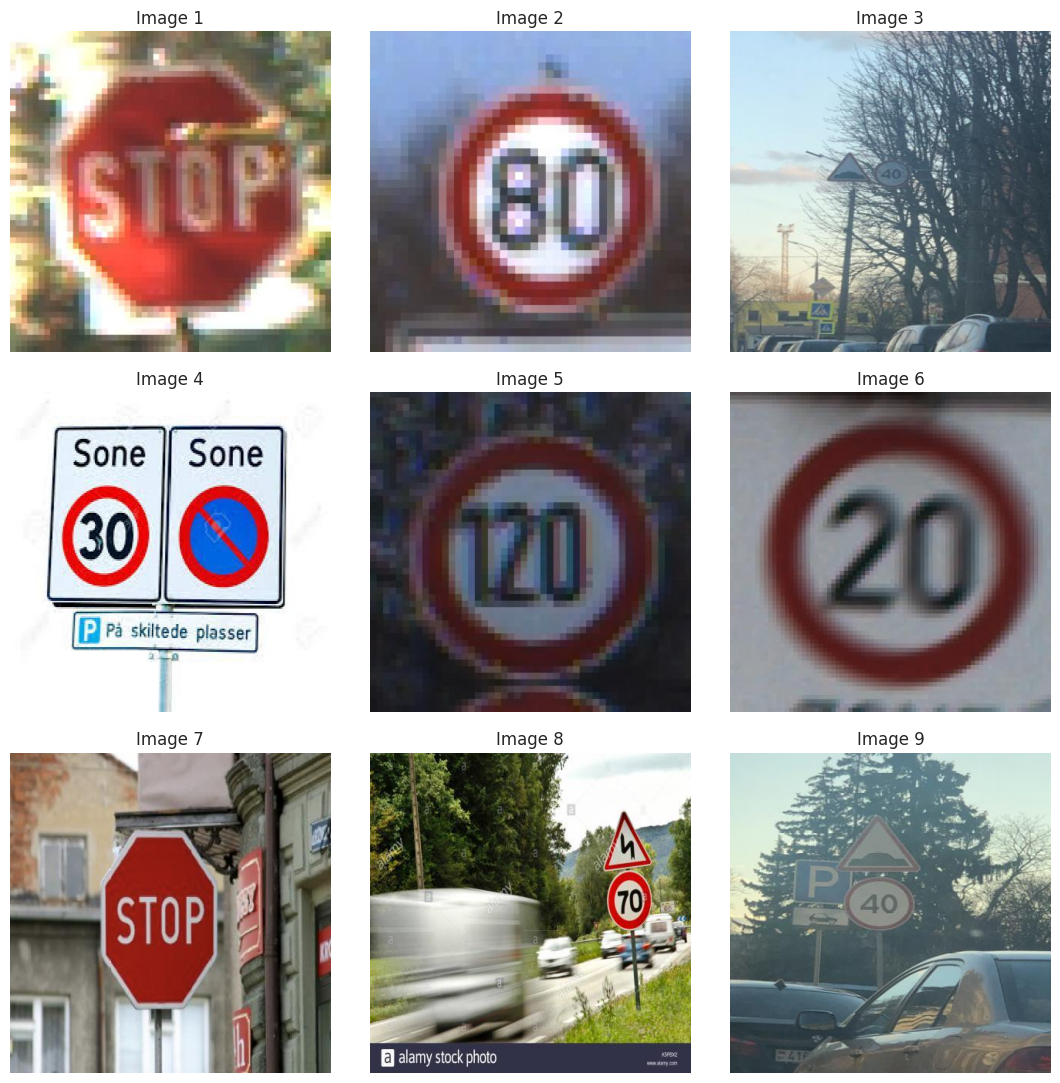

In [10]:
Image_dir = '/kaggle/input/duy-data-pbl-4/Data_Lately/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [18]:
model = YOLO('/kaggle/input/model-v4/V4.pt')

In [19]:
Result_Final_model = model.train(
    data="/kaggle/input/duy-data-pbl-4/Data_Lately/data.yaml",
    epochs=100,
    imgsz=416,
    batch=64,
    lr0=0.0001,
    dropout=0.15,
    device=0,
    augment=True  # Enable data augmentation
)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/model-v4/V4.pt, data=/kaggle/input/duy-data-pbl-4/Data_Lately/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

wandb: Currently logged in as: tpttruong61030803 (truong123). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/duy-data-pbl-4/Data_Lately/train/labels... 3099 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3099/3099 [00:04<00:00, 748.78it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/duy-data-pbl-4/Data_Lately/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/duy-data-pbl-4/Data_Lately/valid/labels... 890 images, 0 backgrounds, 0 corrupt: 100%|██████████| 890/890 [00:01<00:00, 670.18it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/duy-data-pbl-4/Data_Lately/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.52G     0.3804     0.3323     0.8825         57        416: 100%|██████████| 49/49 [00:15<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        890        967       0.97      0.923       0.95      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.53G     0.3882     0.3502     0.8869         63        416: 100%|██████████| 49/49 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        890        967      0.954      0.911      0.943      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.53G     0.4118     0.3864     0.8934         52        416: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        890        967      0.971       0.89      0.942      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.54G     0.4338     0.4157     0.9001         63        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.948      0.895      0.938      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.53G     0.4312     0.4261     0.8995         55        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        890        967      0.959      0.881      0.936      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.54G     0.4423     0.4337     0.9006         55        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.939      0.897      0.943       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.53G     0.4445     0.4328     0.9032         63        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        890        967      0.963      0.895      0.943      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.49G     0.4279     0.4275     0.8998         67        416: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.954      0.889      0.942       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.53G     0.4382     0.4343     0.9003         53        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.958      0.889      0.938      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.49G     0.4346     0.4273      0.901         52        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.938      0.906      0.937      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.53G     0.4337     0.4253     0.8976         53        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        890        967      0.932      0.896       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.49G      0.438     0.4228     0.9024         58        416: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.944      0.887      0.939      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.53G     0.4335     0.4234     0.9039         50        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        890        967      0.973      0.909      0.949      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.54G     0.4361     0.4241     0.8985         69        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        890        967      0.948      0.914      0.942      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.53G     0.4285     0.4202     0.8987         57        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        890        967      0.953      0.902      0.941      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.49G      0.435      0.423        0.9         59        416: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        890        967      0.937      0.912      0.943      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.53G     0.4312     0.4141     0.8967         65        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        890        967      0.972      0.899      0.943      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.49G     0.4317     0.4229     0.8978         49        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.965      0.909      0.947      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.53G     0.4268     0.4148     0.8945         46        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        890        967      0.971      0.881      0.941      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.49G     0.4282     0.4128     0.8996         62        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.954      0.889      0.942      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.53G     0.4342     0.4204     0.9027         55        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.964      0.907      0.946       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.49G     0.4243     0.4029     0.8932         55        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.969      0.882      0.935      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.53G     0.4273     0.4169     0.8977         57        416: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        890        967      0.969      0.891      0.942      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.49G     0.4174     0.4028     0.8947         58        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        890        967      0.955       0.91      0.946      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.53G     0.4294      0.407      0.895         52        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.959      0.898      0.942      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.49G     0.4167     0.3804     0.8939         50        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.969      0.904      0.947      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.53G     0.4223     0.4017     0.8941         61        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.963      0.901      0.948      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.49G     0.4191     0.3984     0.8931         71        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        890        967      0.951      0.921      0.953      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.53G     0.4205     0.3976      0.894         60        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        890        967      0.952      0.904      0.944      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.54G     0.4203      0.391     0.8921         57        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        890        967       0.97      0.896      0.944      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.54G     0.4192     0.3873     0.8958         56        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        890        967      0.977      0.903      0.948      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.49G     0.4179     0.3861     0.8952         63        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        890        967      0.984      0.899      0.947      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.53G     0.4129     0.3855     0.8905         57        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.971      0.912      0.952      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.49G     0.4138     0.3957     0.8904         56        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.972      0.902      0.948      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.53G     0.4089     0.3757     0.8911         58        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        890        967      0.964      0.906       0.95       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.49G     0.4175     0.3786     0.8927         57        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.958      0.925       0.95      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.53G      0.409     0.3766     0.8952         71        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        890        967      0.974      0.901      0.946      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.49G     0.4077     0.3708     0.8952         55        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.972       0.91       0.95      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.53G      0.407     0.3715     0.8929         59        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.971      0.913      0.951      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.49G     0.4051      0.374     0.8905         62        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        890        967       0.96      0.921      0.951      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.54G     0.3993      0.361     0.8935         59        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        890        967      0.965      0.915      0.953      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.69G     0.4016     0.3535     0.8867         56        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        890        967      0.966      0.922      0.954      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.53G     0.4007     0.3602     0.8917         51        416: 100%|██████████| 49/49 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        890        967      0.968      0.921      0.952      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.54G     0.4075     0.3667     0.8891         67        416: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.977      0.911       0.95      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.53G     0.3975     0.3639     0.8869         67        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        890        967      0.979      0.906      0.951       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.49G     0.3947       0.36     0.8904         55        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.962      0.917      0.948       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.53G     0.3965     0.3514     0.8887         58        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.963      0.921      0.953      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.49G     0.3938      0.357     0.8887         53        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        890        967      0.953      0.919      0.952      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.53G     0.3947     0.3523     0.8895         53        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.972      0.918      0.956      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.69G     0.3924     0.3467     0.8913         63        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        890        967       0.97      0.913      0.951      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.53G     0.3872     0.3402     0.8897         64        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.975      0.915      0.955      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.49G     0.4005     0.3556     0.8933         57        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        890        967      0.967       0.91       0.95      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.53G     0.3985      0.345     0.8897         56        416: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        890        967      0.967      0.929      0.958      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.49G     0.3939     0.3431     0.8882         69        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        890        967       0.97      0.923      0.952      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.53G     0.3912     0.3446      0.884         49        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        890        967       0.97      0.915      0.951      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.54G     0.3827     0.3394     0.8869         56        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        890        967      0.964      0.927      0.954      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.53G     0.3927     0.3443     0.8906         51        416: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.971       0.92      0.954      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.49G     0.3806     0.3372     0.8831         56        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        890        967      0.957      0.918      0.951      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.53G     0.3844     0.3312     0.8868         54        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.966      0.924      0.955      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.49G     0.3884     0.3388     0.8866         54        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        890        967      0.972      0.919      0.954      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.53G      0.384     0.3379     0.8892         49        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        890        967      0.948      0.926      0.953      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.49G     0.3761     0.3236     0.8862         55        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.966      0.907       0.95      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.53G     0.3779      0.331     0.8858         60        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        890        967      0.974      0.904      0.953      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.49G     0.3859     0.3299     0.8837         61        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.963      0.916       0.95      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.53G     0.3844     0.3369     0.8896         55        416: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        890        967      0.963      0.919      0.953      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.69G     0.3766     0.3255     0.8808         58        416: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        890        967      0.968      0.913       0.95      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.53G     0.3736     0.3206     0.8856         51        416: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        890        967      0.966       0.92      0.956      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.49G     0.3791     0.3175     0.8807         65        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.971      0.924      0.954       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.53G     0.3741     0.3165     0.8854         59        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.976      0.924      0.955      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.54G     0.3759     0.3213     0.8864         57        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.975      0.923      0.953      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.53G     0.3675     0.3167     0.8843         61        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        890        967      0.973      0.907      0.952      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.49G      0.377      0.321     0.8846         70        416: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.977      0.922      0.954       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.53G     0.3708      0.308     0.8812         67        416: 100%|██████████| 49/49 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.974       0.92      0.956       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.49G     0.3651     0.3048     0.8791         62        416: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        890        967      0.967      0.921      0.952      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.53G     0.3754     0.3107     0.8831         66        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.964       0.92      0.952      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.54G     0.3627        0.3     0.8854         60        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.971      0.921      0.953       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.53G      0.367     0.3082     0.8818         55        416: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.977      0.906      0.953      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.49G     0.3634     0.3012     0.8823         65        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.974      0.915      0.955      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.53G     0.3696     0.3005      0.883         68        416: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        890        967      0.972      0.915      0.955      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.54G     0.3601     0.2991     0.8822         58        416: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.977      0.913      0.955      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.53G     0.3629     0.2934     0.8812         55        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        890        967      0.951      0.924      0.955      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.49G     0.3593     0.2927     0.8818         50        416: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        890        967      0.957      0.929      0.955      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.53G     0.3613        0.3     0.8827         70        416: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.969      0.919      0.956      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.49G     0.3576     0.2969     0.8812         54        416: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        890        967      0.966       0.92      0.955      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.53G     0.3565     0.2932     0.8797         56        416: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.956      0.929      0.956      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.49G     0.3587     0.2894     0.8769         54        416: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967       0.97      0.918      0.954      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.53G     0.3575     0.2925     0.8807         58        416: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.965      0.918      0.956      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.49G     0.3505     0.2805     0.8763         62        416: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.973      0.919      0.955      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.53G     0.3552     0.2943     0.8804         55        416: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        890        967      0.974      0.913      0.954      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.54G     0.3572     0.2977     0.8775         58        416: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.974      0.915      0.956      0.866


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.54G     0.3288     0.1893     0.8263         28        416: 100%|██████████| 49/49 [00:16<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.971      0.909      0.954      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.49G     0.3239     0.1863     0.8299         28        416: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        890        967       0.96      0.924      0.954      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.53G     0.3181     0.1823     0.8255         29        416: 100%|██████████| 49/49 [00:14<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        890        967      0.956      0.928      0.956      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.49G     0.3155       0.18     0.8249         31        416: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        890        967      0.959      0.924      0.954      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.53G     0.3162     0.1791     0.8253         32        416: 100%|██████████| 49/49 [00:14<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        890        967      0.961      0.926      0.956      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.49G     0.3111     0.1772     0.8232         29        416: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        890        967      0.971      0.919      0.956      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.53G     0.3147     0.1772     0.8209         35        416: 100%|██████████| 49/49 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        890        967      0.972      0.922      0.957       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.49G     0.3077     0.1778     0.8197         31        416: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        890        967      0.964      0.926      0.956      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.53G     0.3067     0.1741     0.8192         28        416: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.966      0.926      0.956      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.49G     0.3106     0.1747     0.8244         30        416: 100%|██████████| 49/49 [00:14<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        890        967      0.969      0.926      0.957      0.871



100 epochs completed in 0.546 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3008963 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


                   all        890        967      0.967      0.926      0.956      0.863
             Turn Left         70         73      0.983       0.79      0.855      0.762
            Turn Right         48         58      0.881      0.655      0.699      0.574
        Speed Limit 10         15         15      0.979          1      0.995      0.981
       Speed Limit 100         52         52      0.932          1      0.991      0.893
       Speed Limit 110         37         37          1      0.904      0.988      0.921
       Speed Limit 120         60         60      0.962      0.983      0.987      0.898
        Speed Limit 20         56         56      0.989      0.982      0.994      0.876
        Speed Limit 30         70         73      0.973      0.984       0.99      0.932
        Speed Limit 40         52         54      0.958      0.963      0.966      0.868
        Speed Limit 50         67         70      0.969      0.893      0.968      0.873
        Speed Limit 6

lr/pg0,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▅▂▂▂▁▅▂▄▄▂▄▇▄▄▅▆▆▅▄█▇▆▇▇▇▅█▇▇▆▆▇█▇█▇▇▇██
metrics/mAP50-95(B),▇▃▂▂▁▄▃▄▄▃▄▅▄▅▅▅▅▅▄▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇██▇
metrics/precision(B),▇▇▂▄▁▇▂▆▆▇▇▄█▇▅▇▆█▆▇█▇▆▆▄▆▆██▆█▇▅▆▆█▅▅▇▆
metrics/recall(B),▇▁▂▁▂▅▅▄▄▁▄▇▃▃▇▅▅▅▆▆▆▇█▇▇▆▆▇▇▆▄▆█▆▆▅▇▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅▆█▇███▇█▇▇▇▇▆▇▆▆▆▅▅▅▅▅▅▅▅▄▄▅▄▄▄▄▃▃▃▂▁▁▁


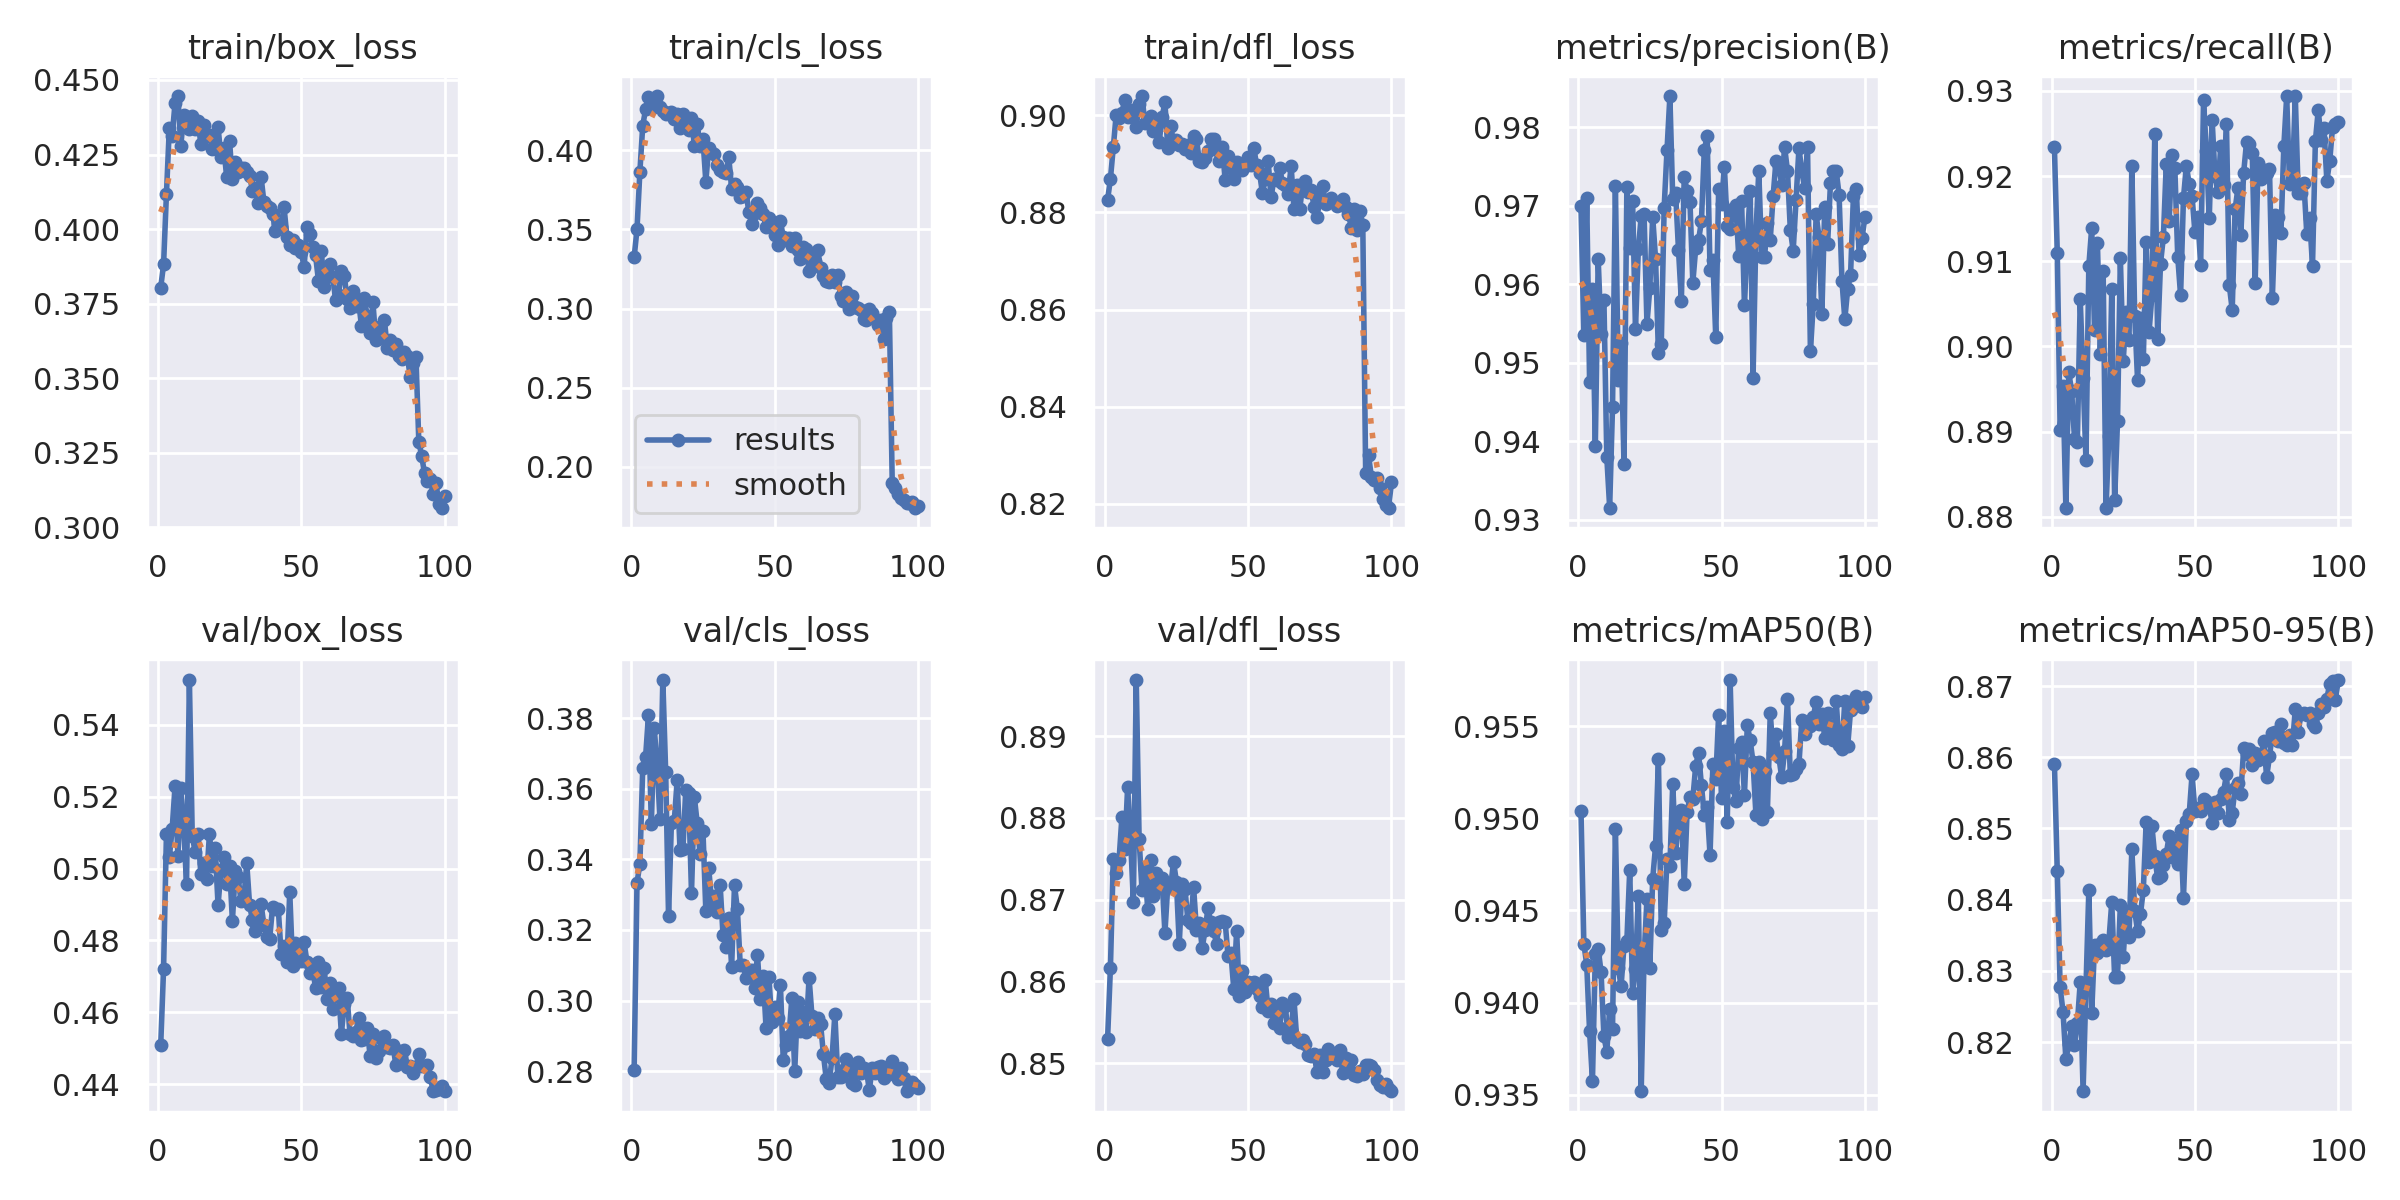

In [20]:
from IPython.display import Image
Image(filename = "/kaggle/working/runs/detect/train3/results.png", width=900)

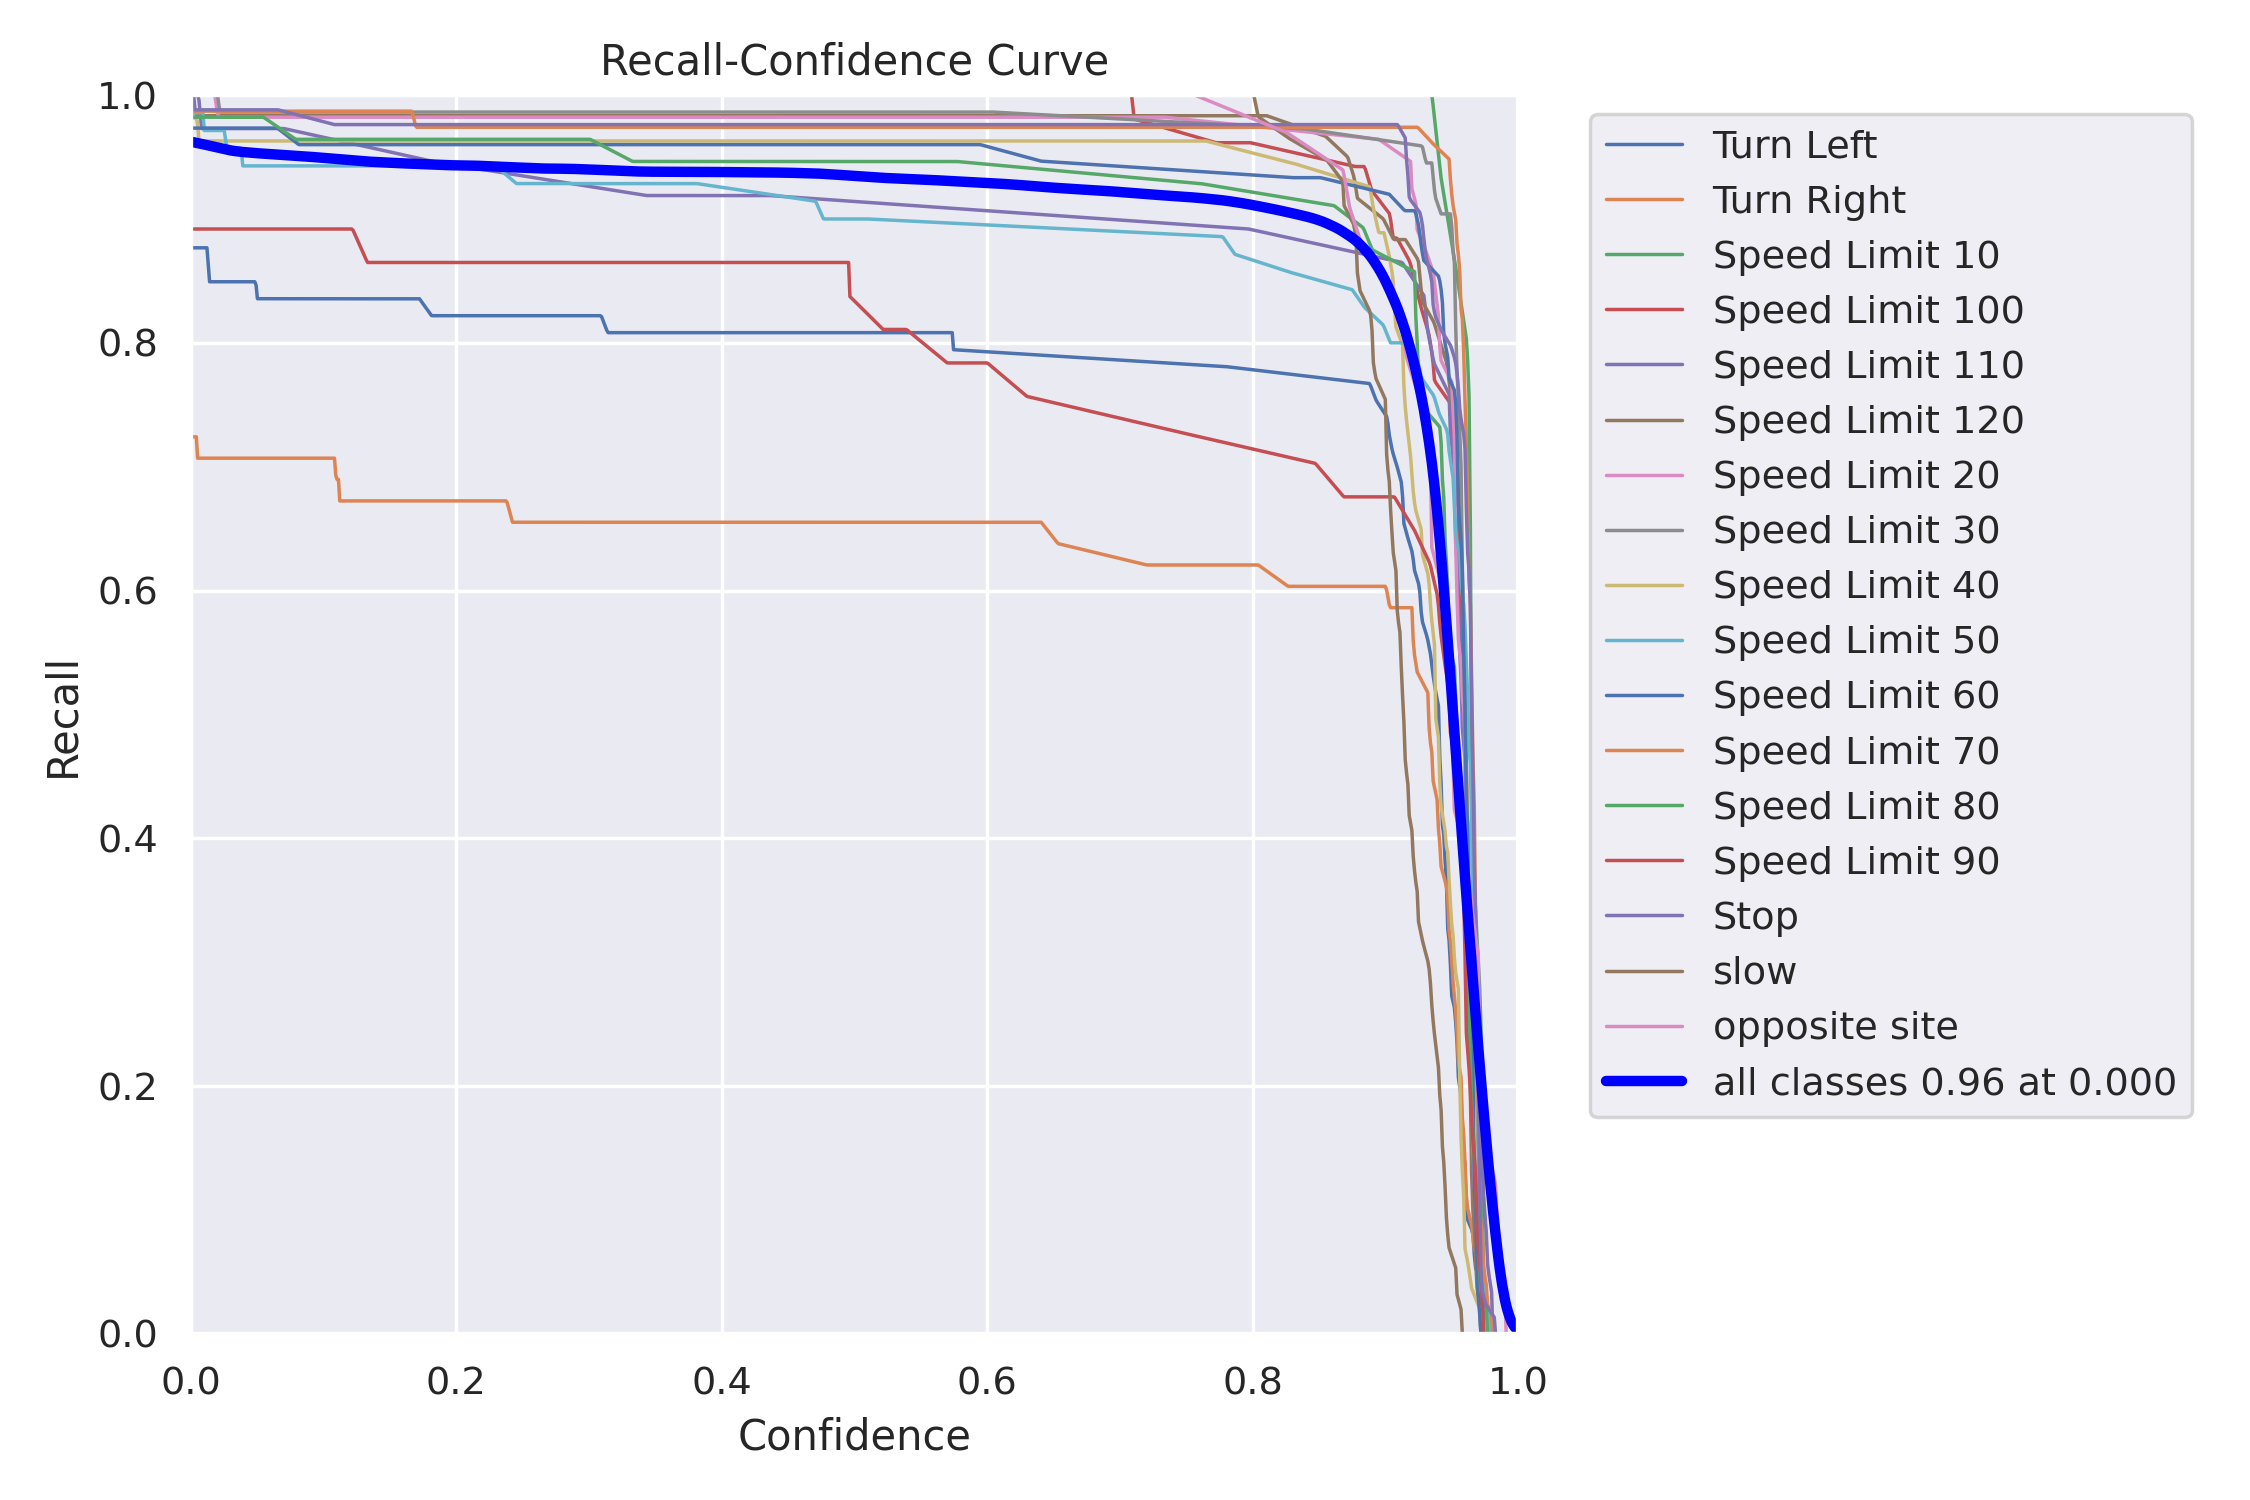

In [21]:
Image(filename=f"/kaggle/working/runs/detect/train3/R_curve.png")

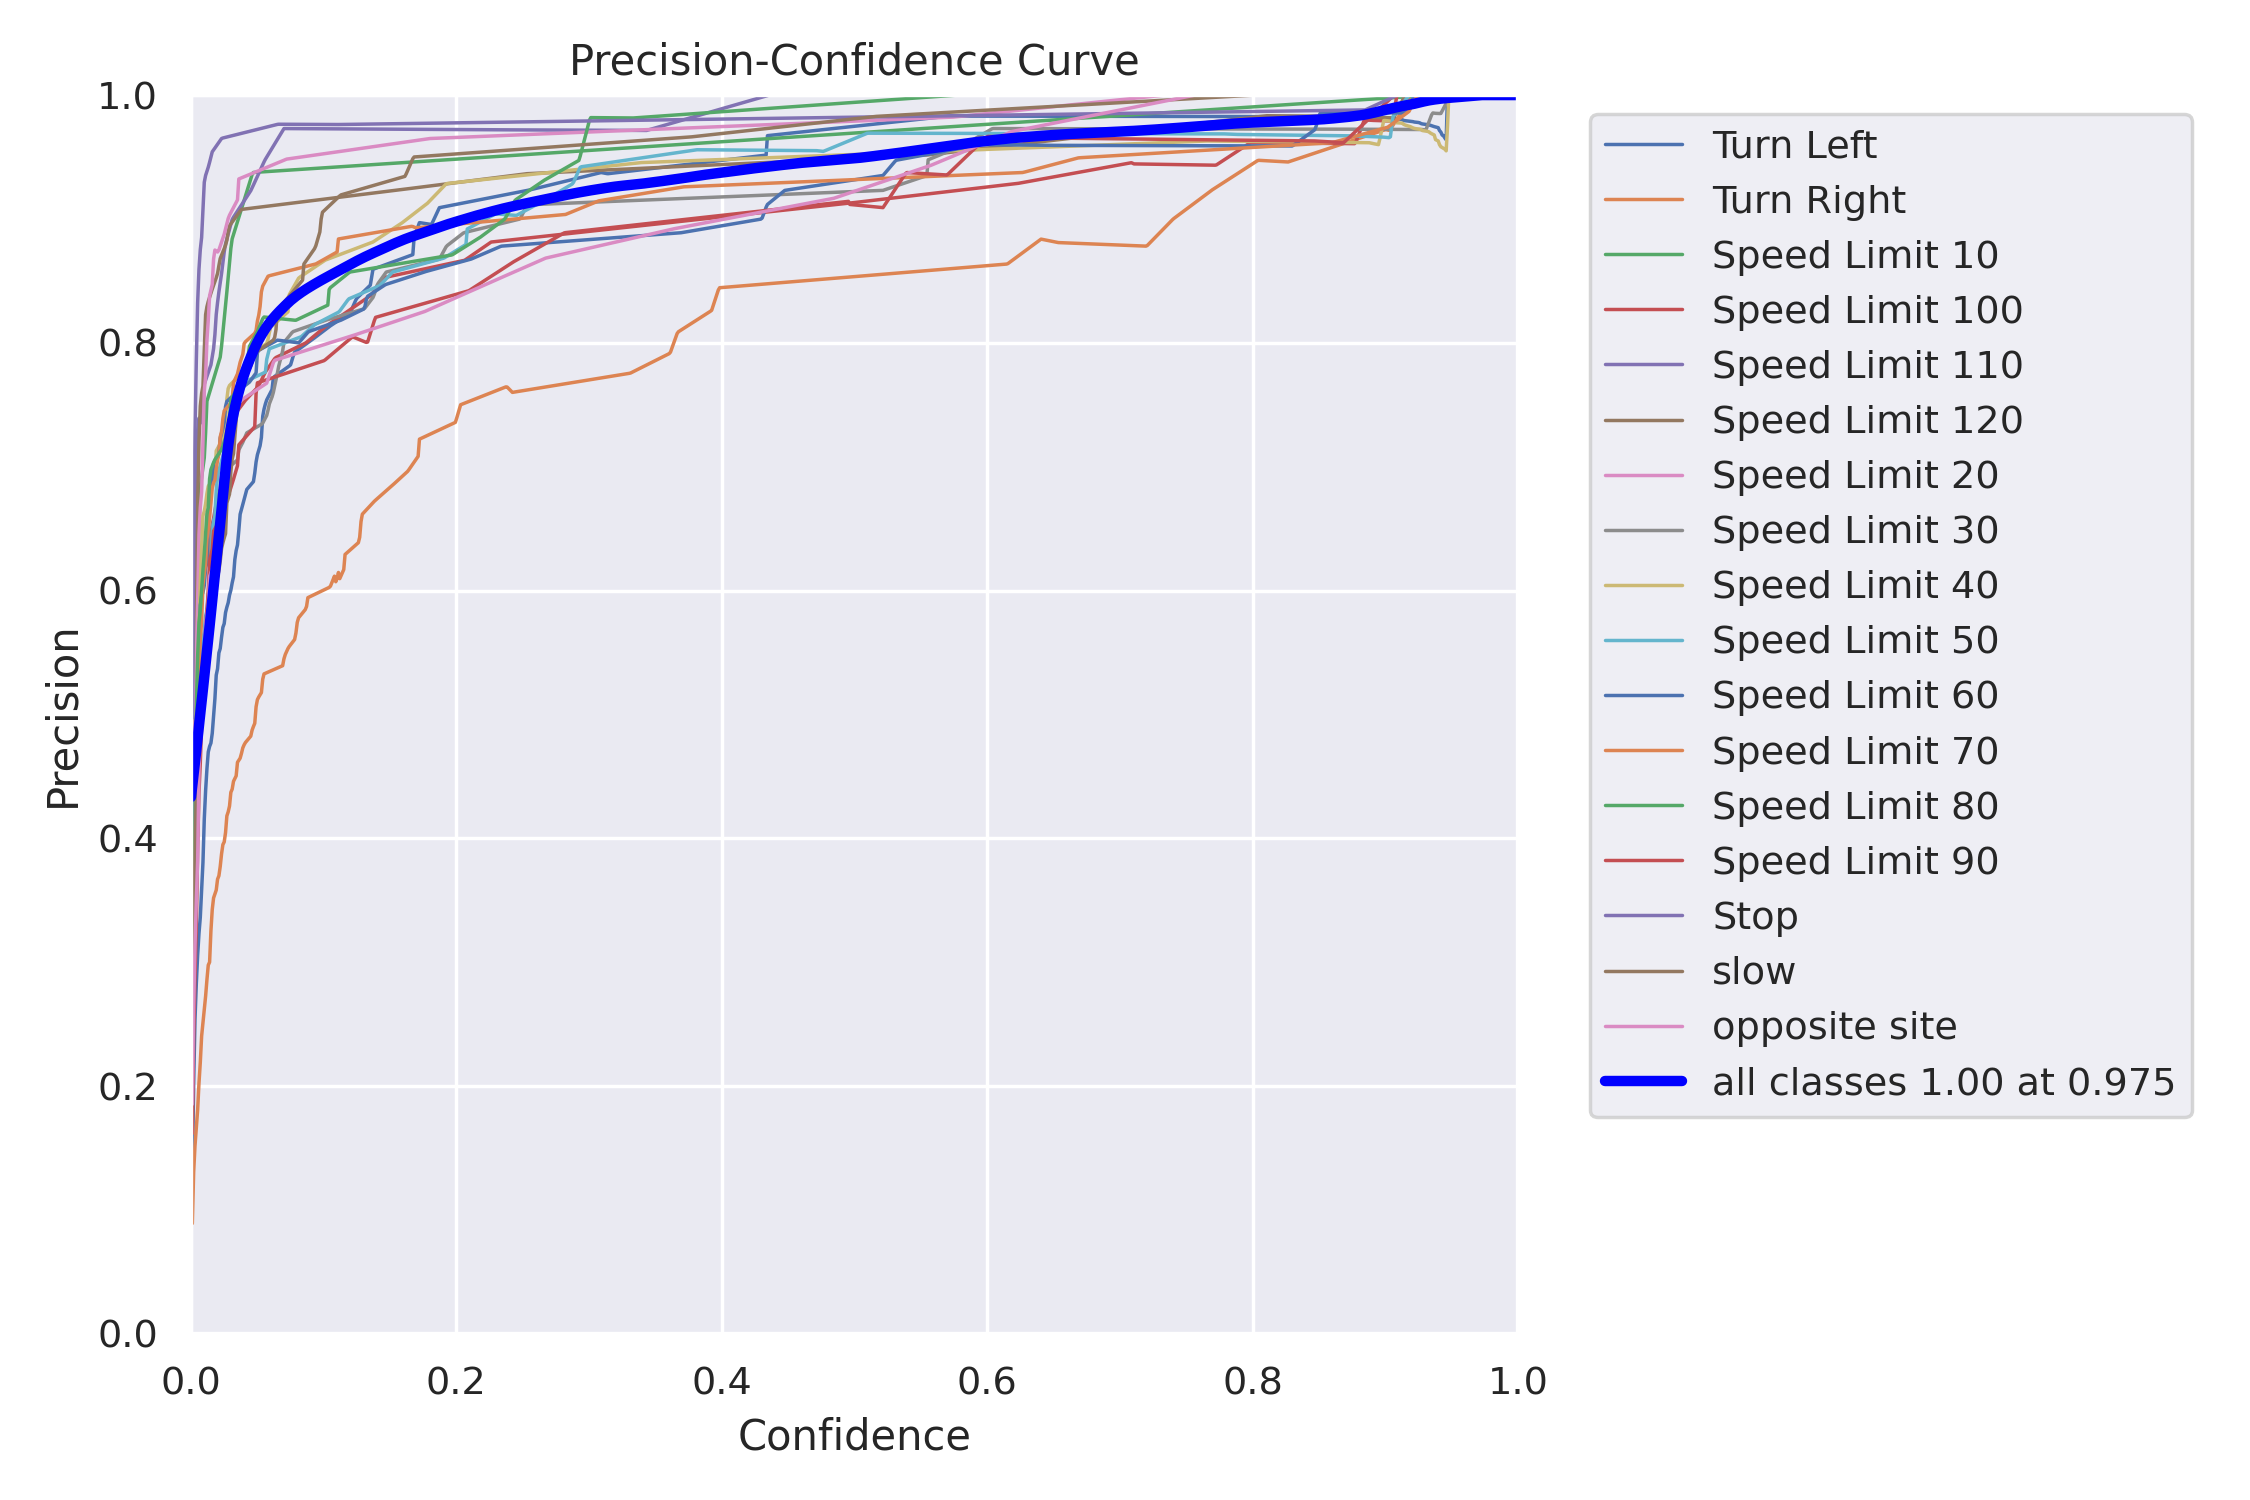

In [22]:
Image(filename=f"/kaggle/working/runs/detect/train3/P_curve.png")

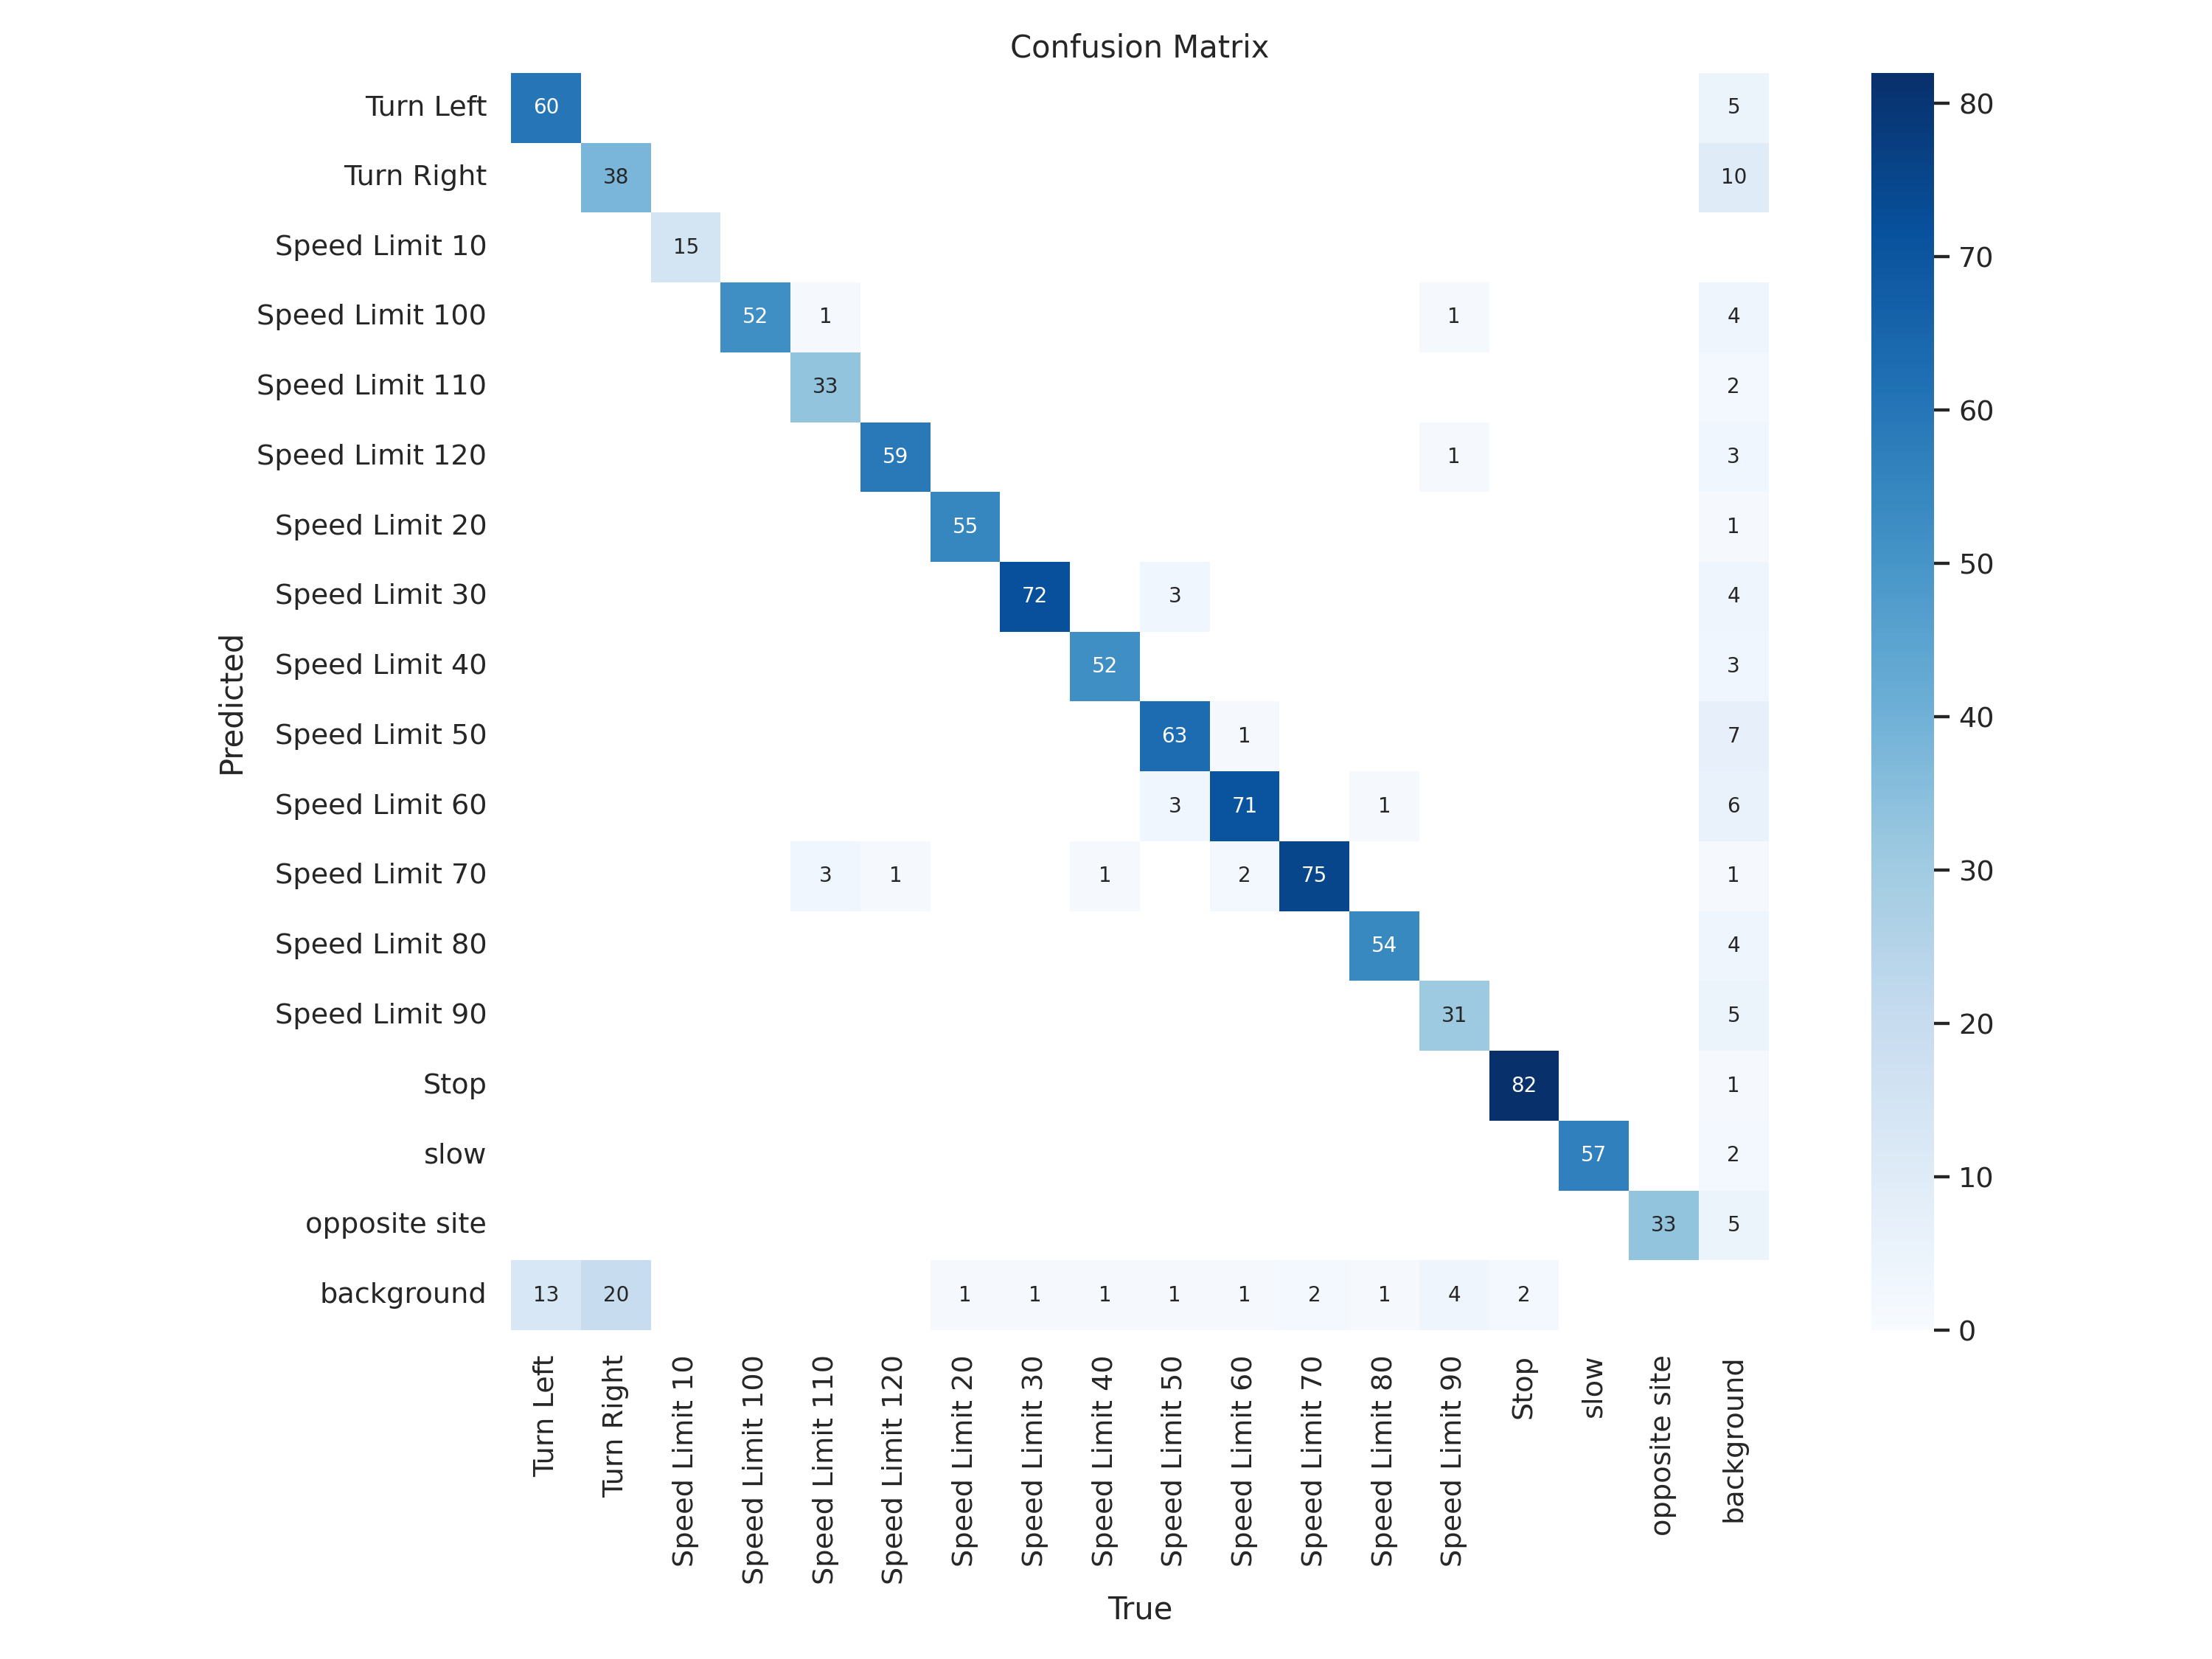

In [25]:
Image(filename=f"/kaggle/working/runs/detect/train3/confusion_matrix.png")

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train2/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
90,91,0.44893,0.27275,0.84778,0.94908,0.87947,0.93860,0.82208,0.49912,0.29725,0.86340,0.000057,0.000057,0.000057
91,92,0.44313,0.26495,0.84387,0.94264,0.88752,0.93462,0.82000,0.50007,0.29504,0.86635,0.000052,0.000052,0.000052
92,93,0.43808,0.26137,0.84270,0.92757,0.89531,0.93525,0.81710,0.50423,0.29148,0.86798,0.000047,0.000047,0.000047
93,94,0.43644,0.25907,0.84512,0.94928,0.87528,0.93069,0.81990,0.49976,0.29192,0.86575,0.000042,0.000042,0.000042
94,95,0.43558,0.25818,0.84592,0.95915,0.87004,0.93327,0.82037,0.49922,0.29095,0.86466,0.000037,0.000037,0.000037
95,96,0.43198,0.25649,0.84068,0.96001,0.87546,0.93208,0.81911,0.49862,0.28808,0.86443,0.000031,0.000031,0.000031
96,97,0.43169,0.25354,0.84232,0.94942,0.88532,0.93272,0.82086,0.49662,0.29053,0.86407,0.000026,0.000026,0.000026
97,98,0.42504,0.24908,0.83561,0.94306,0.88558,0.93628,0.82023,0.49852,0.28935,0.86419,0.000021,0.000021,0.000021
98,99,0.42443,0.25082,0.84081,0.95931,0.87345,0.93504,0.82146,0.49708,0.28856,0.86394,0.000016,0.000016,0.000016
99,100,0.42447,0.25324,0.83632,0.94639,0.88692,0.93389,0.82160,0.49669,0.29080,0.86426,0.000010,0.000010,0.000010


NameError: name 'df' is not defined

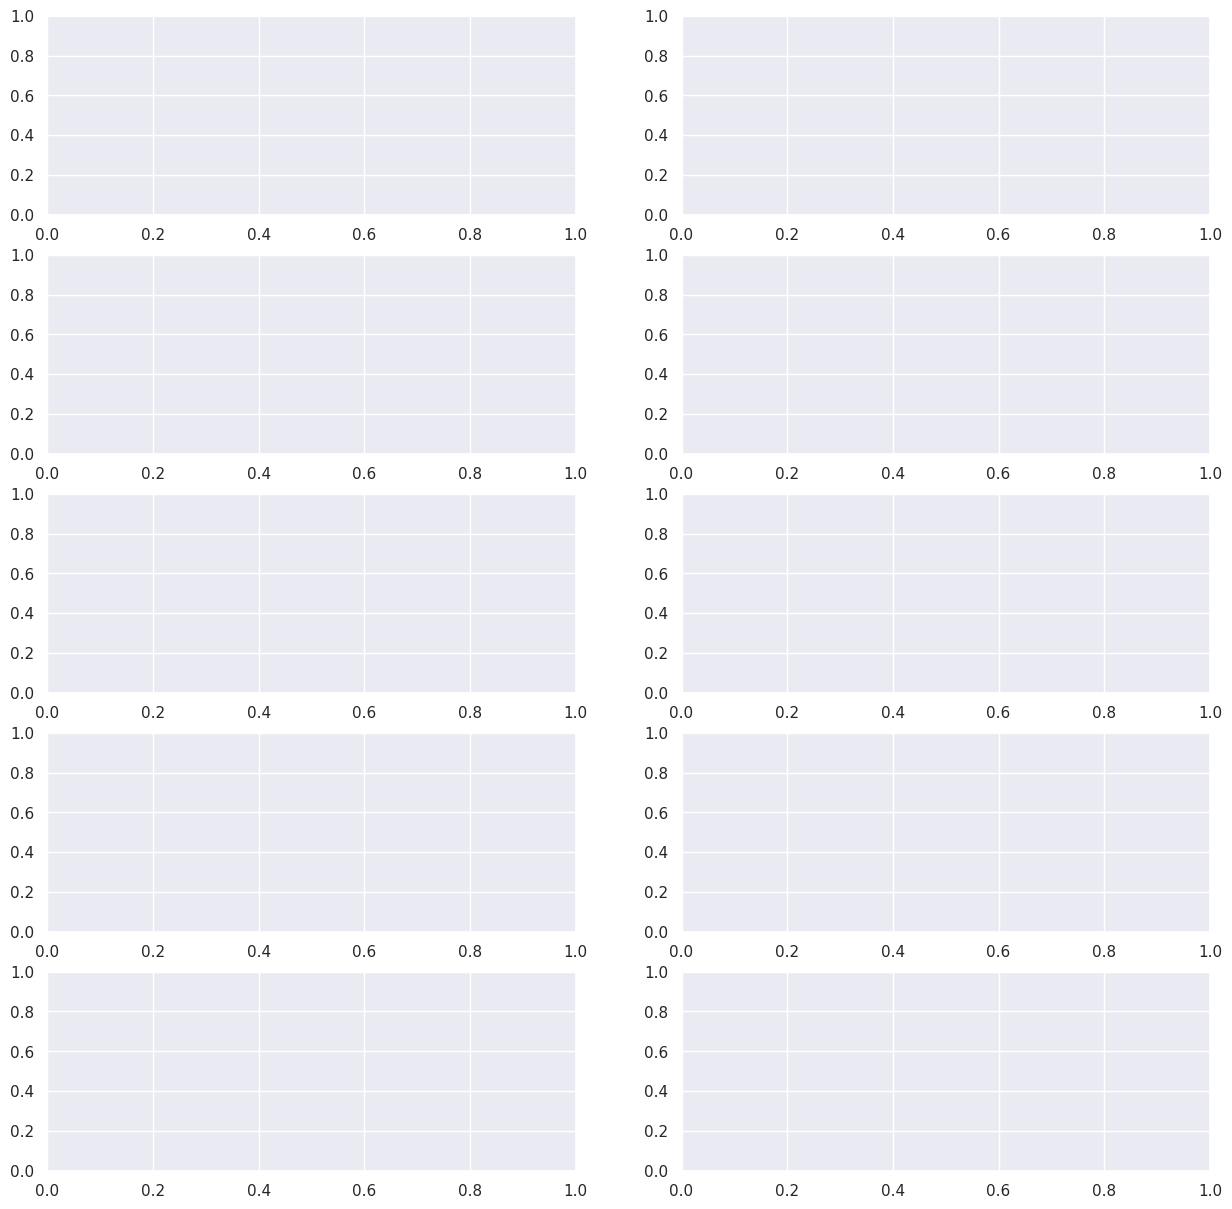

In [ ]:
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()